# Video Analysis

In [1]:
import pytube
# VS Code for the Web: vscode.dev (livestream Oct 21)
url = "https://www.youtube.com/watch?v=sy3TUb_iVJM"

In [29]:
youtube = pytube.YouTube(url)
streams = youtube.streams
mp4 = streams.filter(file_extension='mp4').order_by('resolution')
len(mp4)

7

In [30]:
[s.resolution for s in mp4]

['144p', '240p', '360p', '360p', '480p', '720p', '720p']

In [34]:
[s.resolution + " (" + str(round(s.filesize/2**10/2**10)) + " MB)" for s in mp4]

['144p (14 MB)',
 '240p (28 MB)',
 '360p (117 MB)',
 '360p (52 MB)',
 '480p (91 MB)',
 '720p (271 MB)',
 '720p (216 MB)']

In [5]:
s = streams.filter(progressive=True, file_extension='mp4').order_by('resolution').desc().first()
s

<Stream: itag="22" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">

In [8]:
s.resolution

'720p'

In [11]:
s.filesize

283811719

In [14]:
# translate to kB
s.filesize/2**10

277159.8818359375

In [15]:
# translate to MB
s.filesize/2**10/2**10

270.6639471054077

The legacy streams that contain the audio and video in a single file (referred to as “progressive download”) are still available, but only for resolutions 720p and below.

progressive streams have the video and audio in a single file, but typically do not provide the highest quality media; meanwhile, adaptive streams split the video and audio tracks but can provide much higher quality.

In [35]:
s.is_progressive

True

In [12]:
s.download()

'd:\\devel\\video-analyzer\\VS Code for the Web vscodedev.mp4'

## Select video sequence 

In [37]:
import os
dl = os.listdir("downloads")
dl

['Get started with Visual Studio Code.mp4']

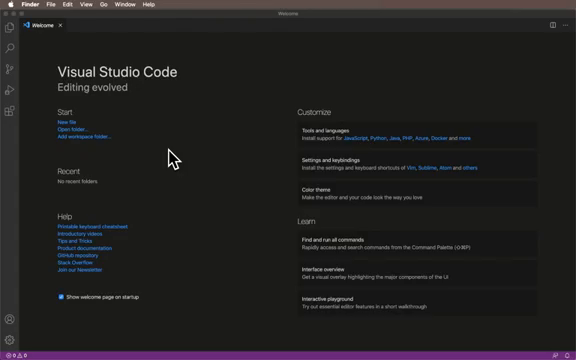

In [44]:
from moviepy.editor import VideoFileClip
# import matplotlib.pyplot as plt
from PIL import Image
t = 42
myclip = VideoFileClip("downloads/"+dl[0])
f = myclip.get_frame(t)
# plt.imshow(f)
Image.fromarray(f)